In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\91993\Downloads\archive (1).zip")
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [3]:
df = df.dropna()  
df = df[df['Year'] >= 1990]  

# Select relevant features
df = df[['Year', 'Annual CO₂ emissions (tonnes )']]  

C:\Users\91993\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91993\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


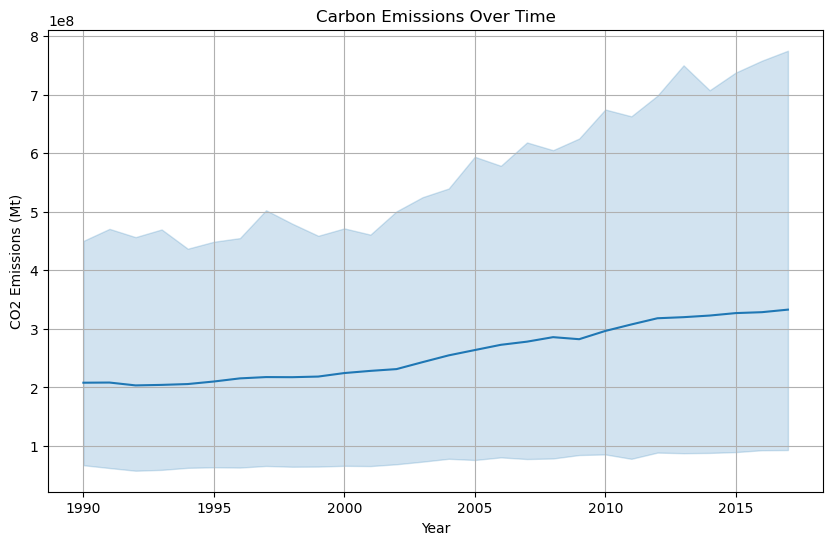

In [4]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Annual CO₂ emissions (tonnes )')
plt.title('Carbon Emissions Over Time')
plt.ylabel('CO2 Emissions (Mt)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [5]:
X = df[['Year']]  # Feature
y = df['Annual CO₂ emissions (tonnes )']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: -0.0021542722444274354
Mean Absolute Error: 370223356.7305443
Mean Squared Error: 2.3971952725765857e+18


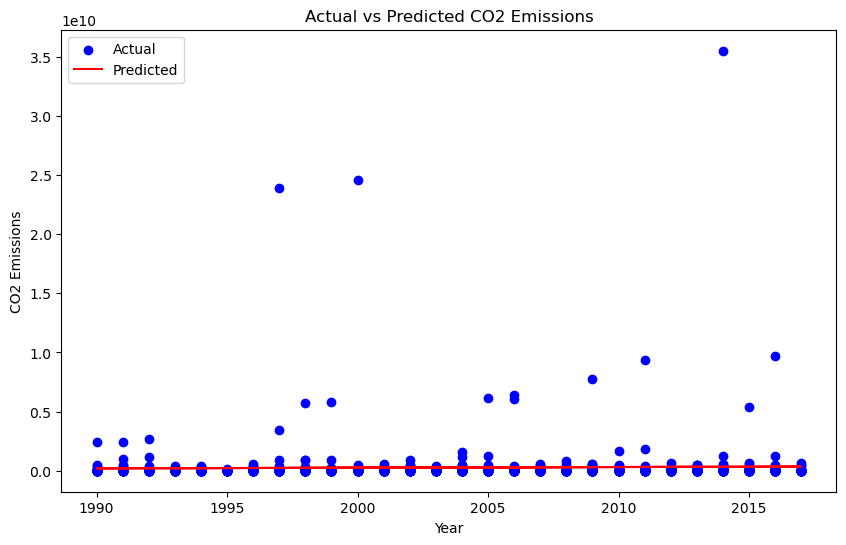

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

In [9]:
future_years = pd.DataFrame({'Year': [2025, 2030, 2040]})
future_predictions = model.predict(future_years)
for year, prediction in zip(future_years['Year'], future_predictions):
    print(f"Predicted CO2 emissions in {year}: {prediction:.2f} Mt")

Predicted CO2 emissions in 2025: 398716522.47 Mt
Predicted CO2 emissions in 2030: 427687565.33 Mt
Predicted CO2 emissions in 2040: 485629651.05 Mt
